#DESCRIPTIVE STATISTICS : PREPARATION AND ANALYSIS OF DATA#

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 06/16/2024

**PROBLEM STATEMENT**: ANALYSIS OF COMSUMPTION IN THE STATE OF BIHAR(STATE CODE-10)


**ABOUT DATASET** : This dataset is about 68th round of National Sample Survey Organisation (NSSO) survey

In [48]:
#IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
#READING ONLY BIHAR DATA FROM NSS068 DATSET
BiharData = pd.read_csv("/content/drive/MyDrive/SCMA/A1a/BiharData.csv")

In [51]:
BiharData.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,28969,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,75.000000,1751.572667,44.235150,Bhr,2,311.666667,403.533333
1,28970,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,8.333333,1054.882333,38.600350,Bhr,2,80.000000,184.050000
2,28971,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,4.285714,589.008429,29.118924,Bhr,2,0.000000,80.605714
3,28972,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,20.000000,747.565800,31.400921,Bhr,2,0.000000,91.600000
4,28973,4.700000e+31,1,47044,68,10,1,2,10,102,...,0.0,0.0,0.0,8.000000,653.249000,30.060374,Bhr,2,8.000000,102.660000


In [52]:
BiharData.state.unique()

array([10])

In [53]:
BiharData.shape

(4582, 384)

#CHECK FOR MISSING VALUES #


In [54]:
BiharData.isnull().sum().sort_values(ascending = False)

soyabean_q             4582
soyabean_v             4582
Otherwise_possessed    4407
Meals_School           4299
Meals_Employer         4284
                       ... 
cabbage_q                 0
cauli_q                   0
parwal_q                  0
bhindi_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [55]:
#SUBSETTING ONLY CONSUMPTION RELATED VARIABLES
Bhr = BiharData[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [56]:
Bhr.isnull().sum().sort_values(ascending = False)

Meals_At_Home       20
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

***INFERENCE*** : Among the subsetted consumption variables only "Meals_At_Home" variable consists of 20 missing values which has to be handled.

# HANDLING MISSING VALUES #

In [57]:
Bhr_clean = Bhr.copy()
Bhr_clean.loc[:, 'Meals_At_Home'] = Bhr_clean['Meals_At_Home'].fillna(Bhr['Meals_At_Home'].mean())

In [58]:
#CHECKING FOR MISSING VALUES AFTER IMPUTATION
Bhr_clean.isnull().sum().sort_values(ascending = False)

state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
Meals_At_Home       0
dtype: int64

#CHECK FOR OUTLIERS#

In [59]:
Bhr_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

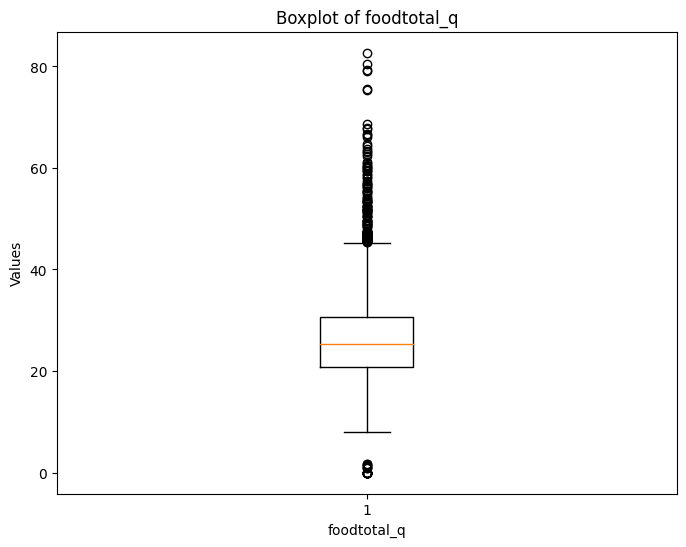

In [60]:
plt.figure(figsize=(8, 6))
plt.boxplot(Bhr_clean['foodtotal_q'])
plt.xlabel('foodtotal_q')
plt.ylabel('Values')
plt.title('Boxplot of foodtotal_q')
plt.show()

#HANDLING OULIERS#

In [61]:
food1 = Bhr_clean['foodtotal_q'].quantile(0.25)
food2 = Bhr_clean['foodtotal_q'].quantile(0.75)
iqr_food = food2-food1
up_limit = food2 + 1.5*iqr_food
low_limit = food1 - 1.5*iqr_food

Text(0.5, 1.0, 'Boxplot of foodtotal_q')

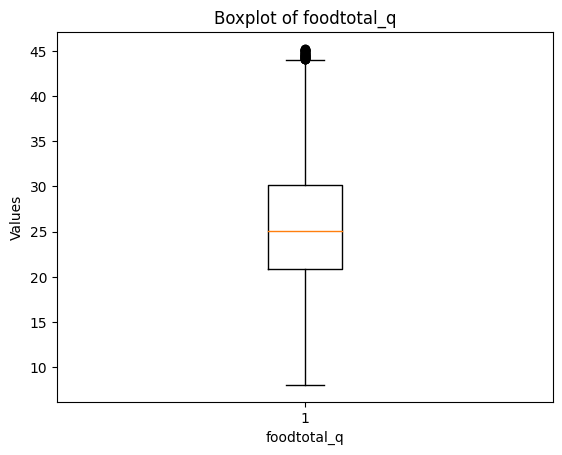

In [62]:
Bhr_clean=Bhr[(Bhr['foodtotal_q']<=up_limit)&(Bhr['foodtotal_q']>=low_limit)]
plt.boxplot(Bhr_clean['foodtotal_q'])
plt.xlabel('foodtotal_q')
plt.ylabel('Values')
plt.title('Boxplot of foodtotal_q')

#SUMMARIZING CRITICAL VARIABLES#

In [63]:
Bhr_clean['District'].unique()

array([28, 36, 31, 32, 35, 30, 34, 33, 29, 37, 26, 22, 25, 24, 23, 27, 13,
        8,  9, 12,  7, 11, 10,  6, 14,  5, 18, 19, 17, 21, 20, 16, 15,  3,
        2,  1,  4, 38])

In [64]:
Bhr_clean.loc[:,'Sector'] = Bhr_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [65]:
#total consumption
Bhr_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [66]:
Bhr_clean.loc[:, 'total_consumption'] = Bhr_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [67]:
Bhr_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
0,Bhr,28,RURAL,2,102,8.000000,8.333333,0.000000,0,1.666667,0.000000,44.235150,75.000000,4.0,137.235150
1,Bhr,28,RURAL,2,102,6.666667,10.000000,0.000000,0,0.333333,0.000000,38.600350,8.333333,60.0,63.933683
2,Bhr,28,RURAL,2,102,6.428571,8.571429,0.035714,0,0.142857,0.171429,29.118924,4.285714,56.0,48.754639
3,Bhr,28,RURAL,2,102,8.000000,6.000000,0.000000,0,0.200000,0.020000,31.400921,20.000000,60.0,65.620921
4,Bhr,28,RURAL,2,102,6.000000,6.000000,0.000000,0,0.200000,0.320000,30.060374,8.000000,60.0,50.580374


In [68]:
Bhr_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              20.192397  49.327415  197.383600  15.033400
2              22.285735  53.327699  249.275262  17.157214

In [69]:
Bhr_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                22.672481  48.199527  169.393992  22.585786
2                20.929983  51.346721  155.750525  22.666783
3                23.279098  45.967808  188.188562  21.391850
4                25.860311  47.707540  197.383600  20.625150
5                17.271632  44.088849  135.300375  22.333151
6                13.357868  50.192990   92.120210  31.866872
7                15.097619  51.029921  106.500192  28.617521
8                18.876728  54.140451  115.035387  21.375150
9                20.767326  51.439109  135.810380  23.571788
10               22.731530  55.076475  171.200317  25.337633
11               22.157724  59.560159  168.400480  30.000230
12               28.855693  68.704983  165.733850  30.260146
13               14.721485  42.282026  112.450335  15.033400
14               24.461947  50.729827  165.017067  20.945113
15               17.713223  49.199127  117.283720  24.121521
16               14.182126  42.673026  100.638027  21.700233
17               19.055674  47.894858  130.490420  17.583447
18               11.976458  43.148532   97.255330  24.400248
19               15.466244  44.377457  154.781350  21.262892
20               13.848670  47.102288  100.728397  26.500145
21               19.356169  55.582031  102.275300  24.355175
22               22.873951  61.870304  157.162679  25.437619
23               28.054792  65.579445  178.100212  22.778629
24               30.550827  59.818415  225.533325  23.972339
25               33.776952  71.628482  249.275262  23.343894
26               21.209197  58.361099  161.630163  27.750113
27               21.876899  48.086873  162.017600  20.258470
28               23.442634  52.440253  175.747112  17.157214
29               17.622314  48.755450  118.156656  22.350143
30               15.703539  45.080082   96.775342  18.607264
31               20.445285  50.481862  160.067167  17.313472
32               19.042054  48.572452  110.903538  20.233550
33               18.809312  49.316377  137.307147  27.415824
34               12.719304  49.180040   86.750205  26.678846
35               14.198902  48.527753  136.225232  21.400150
36               15.096647  49.695587  126.198925  21.825824
37               18.730762  55.143592  130.610276  29.550365
38               19.947355  51.789628  145.437886  27.060083

#RENAMING DISTRICTS & SECTORS USING CODES FROM APPENDIX-NSSO68#

In [79]:
Bhr_clean.loc[:,"District"] = Bhr_clean.loc[:,"District"].replace({2: "Madhubani", 14: "Muzaffarpur", 28: "Patna",30:"Buxar",3:"Sheohar", 38: "Arwal"})
total_consumption_by_districtname=Bhr_clean.groupby('District')['total_consumption'].sum()

#DISPLAYING TOP 3 AND LAST 3 DISTRICTS OF CONSUMPTION#

In [80]:
total_consumption_by_districtcode=Bhr_clean.groupby('District')['total_consumption'].sum()

In [81]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
Patna          11274.654423
Muzaffarpur     7964.582825
Madhubani       7958.741776
Name: total_consumption, dtype: float64

In [82]:
total_consumption_by_districtcode.sort_values(ascending=False).tail(3)

District
Buxar      4147.367587
Sheohar    4137.102763
Arwal      3262.746554
Name: total_consumption, dtype: float64

In [74]:
from statsmodels.stats import weightstats as stests
rural=Bhr_clean[Bhr_clean['Sector']=="RURAL"]
urban=Bhr_clean[Bhr_clean['Sector']=="URBAN"]

In [75]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
0,Bhr,Patna,RURAL,2,102,8.000000,8.333333,0.000000,0,1.666667,0.000000,44.235150,75.000000,4.0,137.235150
1,Bhr,Patna,RURAL,2,102,6.666667,10.000000,0.000000,0,0.333333,0.000000,38.600350,8.333333,60.0,63.933683
2,Bhr,Patna,RURAL,2,102,6.428571,8.571429,0.035714,0,0.142857,0.171429,29.118924,4.285714,56.0,48.754639
3,Bhr,Patna,RURAL,2,102,8.000000,6.000000,0.000000,0,0.200000,0.020000,31.400921,20.000000,60.0,65.620921
4,Bhr,Patna,RURAL,2,102,6.000000,6.000000,0.000000,0,0.200000,0.320000,30.060374,8.000000,60.0,50.580374


In [76]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
1270,Bhr,21,URBAN,1,101,6.25,7.5,0.375,0,0.0,0.0,32.025225,5.00,60.0,51.150225
1271,Bhr,21,URBAN,1,101,5.40,7.0,0.000,0,0.0,0.0,19.536190,3.00,60.0,34.936190
1272,Bhr,21,URBAN,1,101,6.00,8.0,0.000,0,0.0,0.0,22.222210,2.00,60.0,38.222210
1273,Bhr,21,URBAN,1,101,7.50,6.0,0.000,0,0.0,0.0,25.250263,0.00,60.0,38.750263
1274,Bhr,21,URBAN,1,101,8.75,10.0,0.500,0,0.0,0.0,38.012828,6.25,60.0,63.512828


#TEST FOR DIFFERENCES IN MEAN CONSUMPTION AMONG RURAL AND URBAN SECTORS#

In [77]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 8.33414798698796
P-Value: 7.80582434945592e-17


In [78]:
# H1: There is a significant difference between mean consumptions of urban and rural sectors
# Ho: There is no significant difference between mean consumptions of urban and rural sectors

# Checking p-value against significance level(0.05)
if p_value < 0.05:
    print("Reject Ho: There is a significant difference between mean consumptions of urban and rural sectors.")
else:
    print("Fail to reject Ho: There is no significant difference between mean consumptions of urban and rural sectors.")

Reject Ho: There is a significant difference between mean consumptions of urban and rural sectors.


**INFERENCE** : Since Pvalue is less that 0.05 we conclude that there is a significant difference between mean consumptions of urban and rural sectors.This conclusion implies that the data provides sufficient evidence to reject the idea that there is no difference in mean consumptions between urban and rural sectors. Instead, it suggests that there is indeed a meaningful difference between these two groups in terms of consumption levels.